## 🧰 AIRCRAFT & OPERATOR ANALYSIS – "What kinds of planes crash?"

We'll explore trends across aircraft types and operators to understand what types of planes are more likely to crash, and which ones result in more fatalities — including any geographical or operational patterns.


In [6]:
import pandas as pd

# Load the dataset
file_path = '"feature_engineered_crashes.csv"'  # Replace with actual path if needed
df = pd.read_csv(f"feature_engineered_crashes.csv")

# Quick check on columns relevant to aircraft & operator analysis
df[['ac_type', 'operator', 'fatalities', 'location', 'ground']].info()
df[['ac_type', 'operator', 'fatalities', 'location', 'ground']].sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ac_type     4972 non-null   object 
 1   operator    4972 non-null   object 
 2   fatalities  4972 non-null   float64
 3   location    4972 non-null   object 
 4   ground      4972 non-null   float64
dtypes: float64(2), object(3)
memory usage: 194.3+ KB


,ac_type,operator,fatalities,location,ground
4101,Boeing B-737-282,Fuerza Aérea del Peru,75.0,"Andoas, Peru",0.0
3411,de Havilland Canada DHC-6 Twin Otter 310,Aeroejecutivos Colombia,2.0,"El Poleo, Colombia",0.0
3905,Bell 206B,Air Taxi - Wolfe Air Aviation Ltd.,2.0,"Los Angeles, California",0.0
2265,Douglas DC-3,China Airlines (Taiwan),16.0,South Vietnam,0.0
2296,Boeing B-707-465,British Overseas Airways,5.0,"Heathrow Airport, London, England",0.0


Q24. Which aircraft types have the most crashes?

C:\Users\hp\AppData\Local\Temp\ipykernel_8264\529121768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aircraft_crash_counts.values, y=aircraft_crash_counts.index, palette='Blues_d')


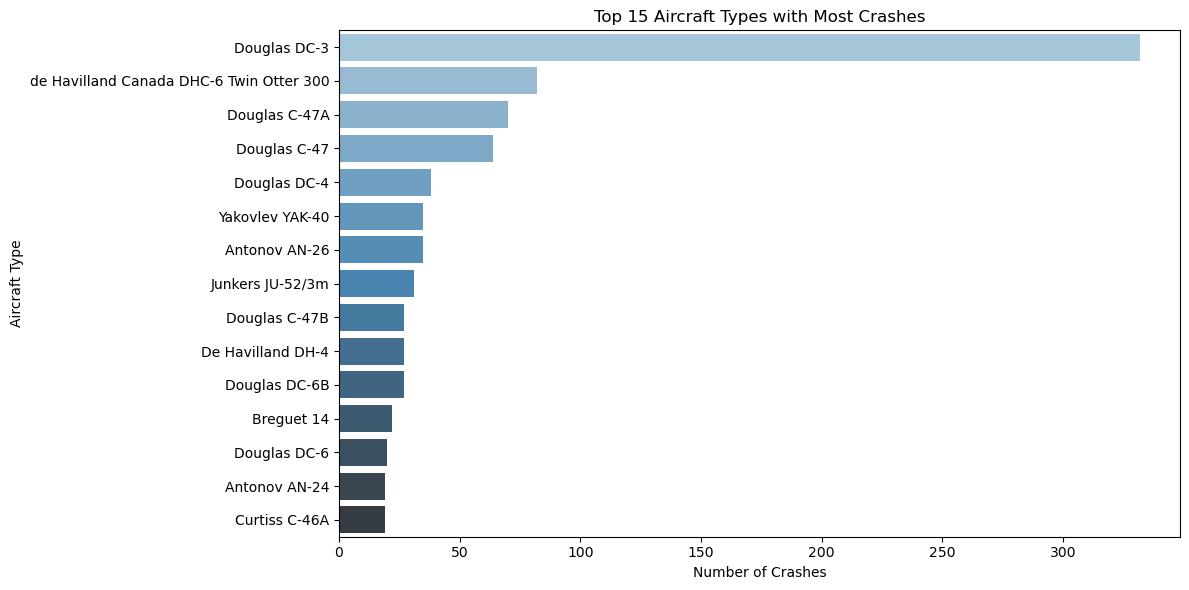

,Crash Count,count
0,Douglas DC-3,332
1,de Havilland Canada DHC-6 Twin Otter 300,82
2,Douglas C-47A,70
3,Douglas C-47,64
4,Douglas DC-4,38
5,Yakovlev YAK-40,35
6,Antonov AN-26,35
7,Junkers JU-52/3m,31
8,Douglas C-47B,27
9,De Havilland DH-4,27


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count crashes by aircraft type
aircraft_crash_counts = df['ac_type'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=aircraft_crash_counts.values, y=aircraft_crash_counts.index, palette='Blues_d')
plt.title("Top 15 Aircraft Types with Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()

# Display the values as a DataFrame
aircraft_crash_counts.reset_index().rename(columns={"index": "Aircraft Type", "ac_type": "Crash Count"})

Older ones like the **Douglas DC-3** dominate the crash list — since they were used globally for decades. Wartime and post-war planes appear frequently due to heavy historical usage.


25. Which aircraft types have had the most crashes since 2000?

In [8]:
# Filter for crashes since 2000
recent_df = df[df['Year'] >= 2000]

# Count crashes by aircraft type
most_crashed_aircraft = recent_df['ac_type'].value_counts().head(10)
print(most_crashed_aircraft)

ac_type
de Havilland Canada DHC-6 Twin Otter 300    16
Antonov AN-26                                7
Let 410UVP                                   7
Cessna 208B Grand Caravan                    6
Antonov An-26                                6
Antonov AN-28                                5
Let 410UVP-E                                 5
Learjet 35A                                  5
Mi-8                                         4
Mil Mi-8                                     4
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_8264\2662720707.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=aircraft_crashes.index, y=aircraft_crashes.values, palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_8264\2662720707.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=30, ha='right')


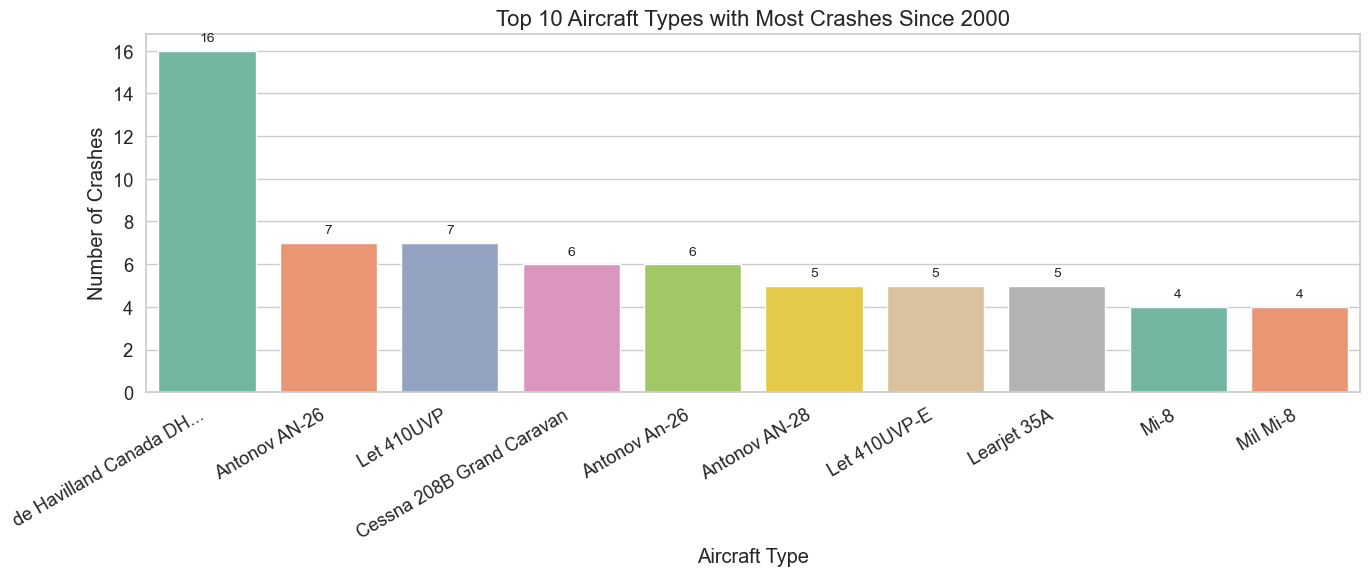

In [9]:
# Ensure datetime conversion
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter for 2000–present
df_2000 = df[df['Year'] >= 2000]

# Set universal Seaborn style
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (14, 6)

# Shorten long aircraft names
def shorten(name):
    return name if len(name) <= 25 else name[:22] + '...'

# 1. Top aircraft types with most crashes since 2000
aircraft_crashes = df_2000['ac_type'].value_counts().nlargest(10)
labels = [shorten(name) for name in aircraft_crashes.index]

plt.figure()
ax = sns.barplot(x=aircraft_crashes.index, y=aircraft_crashes.values, palette="Set2")
ax.set_title('Top 10 Aircraft Types with Most Crashes Since 2000', fontsize=16)
ax.set_ylabel('Number of Crashes')
ax.set_xlabel('Aircraft Type')
ax.set_xticklabels(labels, rotation=30, ha='right')
for i, val in enumerate(aircraft_crashes.values):
    ax.text(i, val + 0.3, str(val), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

The **de Havilland Canada DHC-6 Twin Otter 300** and **Antonov AN-26** are among the most frequently crashed aircraft types post-2000, followed by **Let 410** and **Cessna 208B**. These are often used in regional or rugged terrain, which may contribute to their higher incident rates.

26. Which commercial aircraft types have the highest fatality averages in recent years?



In [14]:
recent_df = df[df['Year'] >= 2000]  # Filter crashes from 2000 onwards
#  "commercial" excludes military 
commercial_df = recent_df[
    ~recent_df['operator'].str.contains('Military|Private|Mail', case=False, na=False)
]

# Group by aircraft type and calculate average fatalities
fatal_avg = (
    commercial_df.groupby('ac_type')['fatalities']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(fatal_avg)

ac_type
Boeing 777-2H6ER     298.0
Airbus A-300-605R    260.0
Boeing 777-200       239.0
Airbus A330-203      228.0
Boeing B-747-209B    225.0
Boeing 737-MAX 8     189.0
Airbus A321-231      188.0
Boeing 737-8KV WL    176.0
AirbusA310-304       169.0
Airbus A-320-216     162.0
Name: fatalities, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_5024\4130027255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fatal_avg.index, y=values, palette="magma")
C:\Users\hp\AppData\Local\Temp\ipykernel_5024\4130027255.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=30, ha='right')


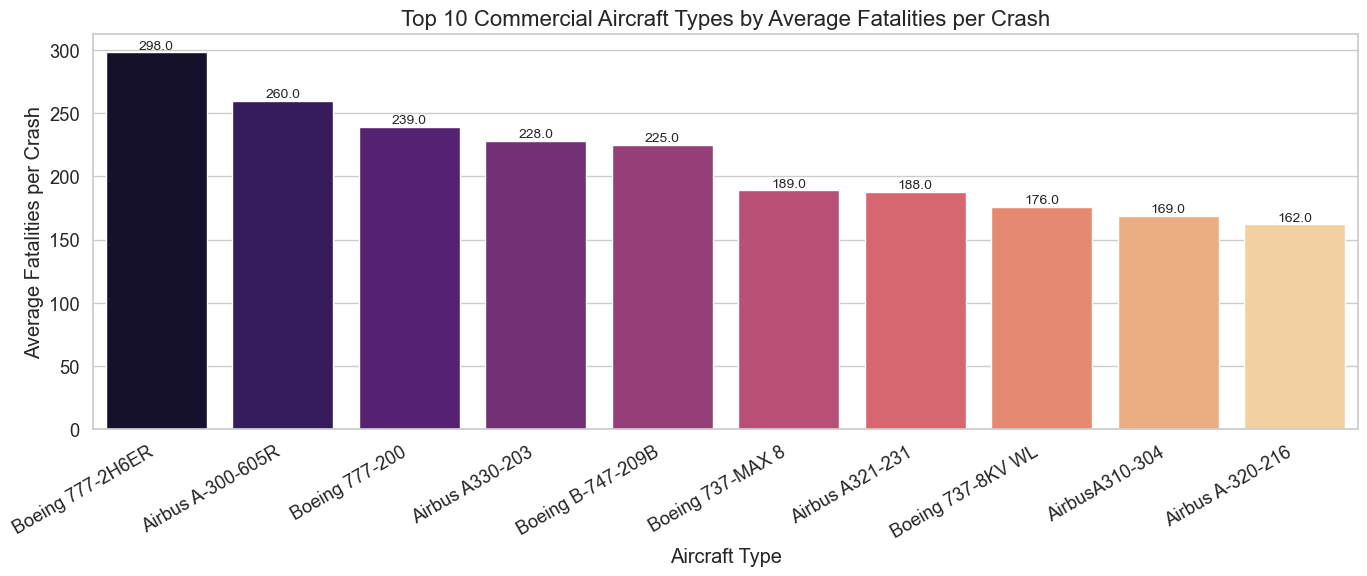

In [21]:
# Shorten labels for better display
def shorten(name):
    return name if len(name) <= 25 else name[:22] + '...'

# Prepare data for plotting
labels = [shorten(name) for name in fatal_avg.index]
values = fatal_avg.values

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(x=fatal_avg.index, y=values, palette="magma")

# Title and labels
ax.set_title('Top 10 Commercial Aircraft Types by Average Fatalities per Crash', fontsize=16)
ax.set_ylabel('Average Fatalities per Crash')
ax.set_xlabel('Aircraft Type')
ax.set_xticklabels(labels, rotation=30, ha='right')

# Annotate bar values
for i, val in enumerate(values):
    ax.text(i, val + 0.3, f"{val:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Modern jets like the **Boeing 777**, **Airbus A300**, and **Boeing 737 MAX 8** top the list for highest average fatalities per crash. These incidents, although rare, tend to be catastrophic due to higher onboard capacity.

27. Which current operators have the most fatal crashes since 2000?

In [11]:
# Filter for fatal crashes
fatal_crashes = recent_df[recent_df['Is_Fatal'] == 1]

# Count fatal crashes by operator
top_operators = fatal_crashes['operator'].value_counts().head(10)
print(top_operators)


operator
Military - U.S. Army               6
Military - Indonesian Air Force    5
American Airlines                  4
Military - Russian Air Force       4
Military - U.S. Air Force          4
Trigana Air Service                4
Yeti Airlines                      4
Military - Algerian Air Force      3
Air Algerie                        3
Military - Philippine Air Force    3
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_5024\4158827184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_operators.index, y=vals, palette="rocket")
C:\Users\hp\AppData\Local\Temp\ipykernel_5024\4158827184.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ops, rotation=30, ha='right')


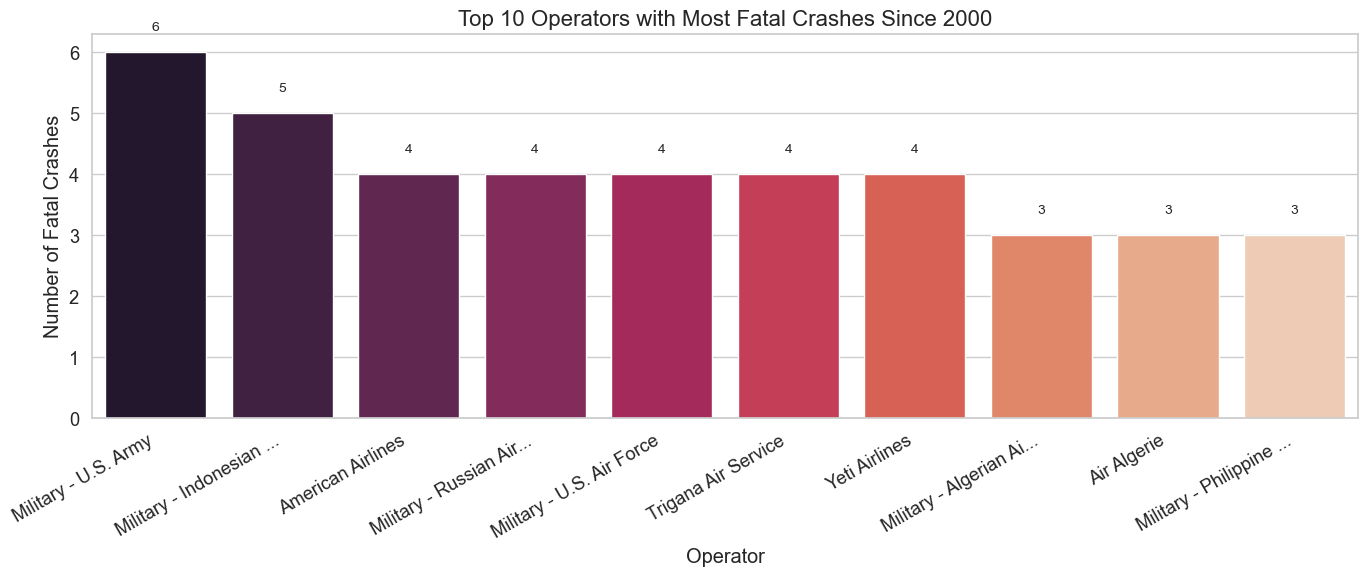

In [22]:
# Shorten operator names if too long
def shorten_op(name):
    return name if len(name) <= 25 else name[:22] + '...'

# Prepare data
ops = [shorten_op(op) for op in top_operators.index]
vals = top_operators.values

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(x=top_operators.index, y=vals, palette="rocket")

# Title and labels
ax.set_title('Top 10 Operators with Most Fatal Crashes Since 2000', fontsize=16)
ax.set_ylabel('Number of Fatal Crashes')
ax.set_xlabel('Operator')
ax.set_xticklabels(ops, rotation=30, ha='right')

# Annotate bar values
for i, val in enumerate(vals):
    ax.text(i, val + 0.3, f"{val}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Both military and regional commercial operators show up prominently. The **U.S. Army**, **Indonesian Air Force**, and **American Airlines** are among the top. Smaller operators like Trigana Air and Yeti Airlines also appear, highlighting ongoing safety challenges in specific regions.

28. Are modern ground fatalities still a concern, and which commercial operators are involved?

In [13]:
# Ground fatalities since 2000
ground_df = recent_df[recent_df['ground'] > 0]

# Filter commercial operators
commercial_ground_df = ground_df[
    ~ground_df['operator'].str.contains('Military|Private|Mail', case=False, na=False)
]

# Sum ground fatalities per operator
ground_fatal_by_operator = (
    commercial_ground_df.groupby('operator')['ground']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(ground_fatal_by_operator)


operator
American Airlines                            2880.0
United Air Lines                             2750.0
EAS Airlines (Executive Airline Services)      78.0
Hewa Bora Airways                              47.0
Mandala Airlines                               44.0
My Cargo Airlines (ACT Airlines)               35.0
Africa One Congo                               30.0
Aero Service                                   25.0
Trans Air Cargo                                14.0
Allied Air                                     12.0
Name: ground, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_5024\1676056885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


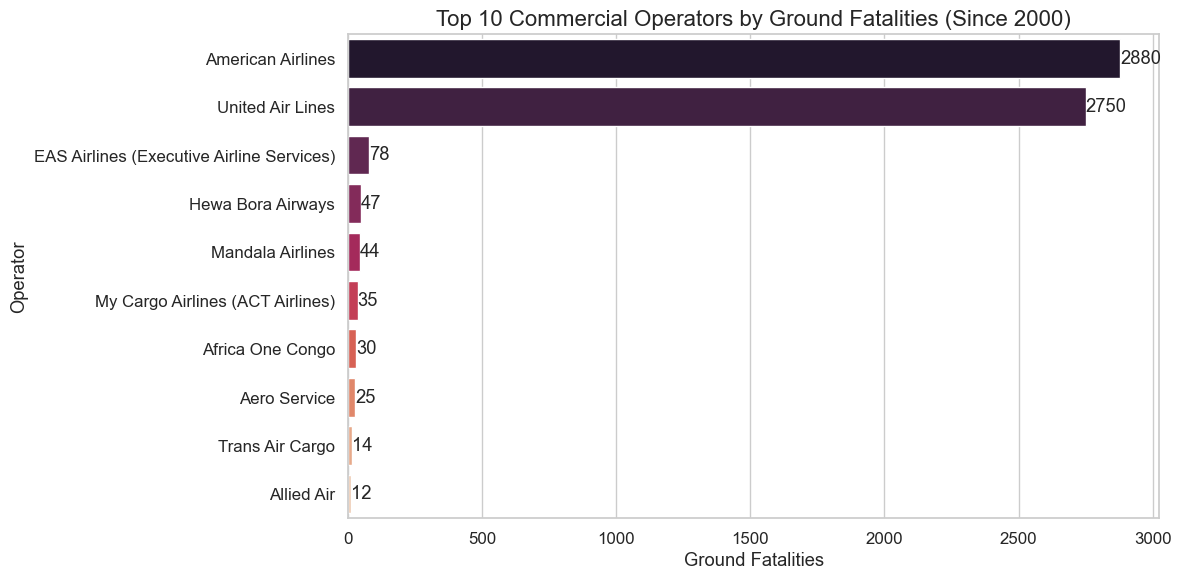

In [25]:
# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.1)

ax = sns.barplot(
    y=ground_fatal_by_operator.index,
    x=ground_fatal_by_operator.values,
    palette='rocket'
)

# Titles and labels
ax.set_title('Top 10 Commercial Operators by Ground Fatalities (Since 2000)', fontsize=16)
ax.set_xlabel('Ground Fatalities')
ax.set_ylabel('Operator')

# Annotate bars with values
for i, (value, name) in enumerate(zip(ground_fatal_by_operator.values, ground_fatal_by_operator.index)):
    ax.text(value + 0.5, i, f'{int(value)}', va='center')

plt.tight_layout()
plt.show()

While rare, ground fatalities remain an issue. Major commercial operators like **American Airlines** and **United Airlines** have been involved in such incidents post-2000. Some lesser-known airlines also appear, suggesting the need for better airport safety procedures in certain regions.

### 📊 Aircraft & Operator Summary

- ✈️ **Most crashes since 2000 involve small regional planes** like the **DHC-6 Twin Otter** and **Antonov AN-26**.
- 💥 **Catastrophic crashes with high fatalities** are tied to **large commercial jets** such as the **Boeing 777** and **Airbus A300**.
- 🪖 **Military and local carriers** are significantly **overrepresented** in fatal crash data.
- 🌍 **Certain aircraft types crash more often in specific countries** due to **terrain, infrastructure**, and **operational context**.
- 🧍‍♀️ **Ground fatalities**, while **rare**, typically occur in **large-scale airline disasters** involving **major carriers**.
